In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Weight']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6218487394957983
0.525


C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [6]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7142857142857143
0.75


In [7]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [8]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [9]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

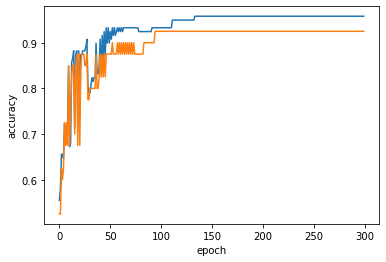

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


- 확률적 경사 하강법은 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다. 샘플을 하나씩 사용하지 않고 여러개를 사용한다면
미니배치 경사 하강법이 된다. 한번에 전체 샘플을 사용하면 배치 경사 하강법이 된다.
- 손실 함수는 확률적 경사 하강법이 최적화할 대상이 된다. 대부분의 문제에 잘 맞는 손실 함수가 이미 정의되어 있다. 이진 분류에는 로지스틱 회귀 손실함수를 사용
다중 분류에는 크로스엔트로피 손실 함수를 사용한다. 회귀 문제에서는 평균 제곱 오차 손실 함수를 사용한다.
- 에포크는 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미한다. 일반적으로 경사 하강법 알고리즘은 수십에서 수백번의 에포크를 반복한다.

- 서포트 벡터머신?